In [1]:
import pandas as pd
import darts
from darts.datasets import AirPassengersDataset
from darts.models import NBEATSModel
from torch.optim import Adam
import matplotlib.pyplot as plt

/Users/dennisbader/miniconda3/envs/darts39/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
series = AirPassengersDataset().load()

In [3]:
series.freq

<MonthBegin>

In [4]:
train, val = series.split_after(pd.Timestamp("19591231"))

In [5]:
model = NBEATSModel(input_chunk_length=7, output_chunk_length=1, random_state=42)

In [6]:
lr_finder = model.lr_find(series=train, val_series=val, verbose=True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Finding best initial lr:  79%|███████▉  | 79/100 [00:06<00:01, 12.64it/s]
LR finder stopped early after 79 steps due to diverging loss.
Restoring states from the checkpoint path at /Users/dennisbader/projects/darts/examples/.lr_find_b2cd6045-a983-4a95-9550-1f032b56d348.ckpt
Restored all states from the checkpoint at /Users/dennisbader/projects/darts/examples/.lr_find_b2cd6045-a983-4a95-9550-1f032b56d348.ckpt


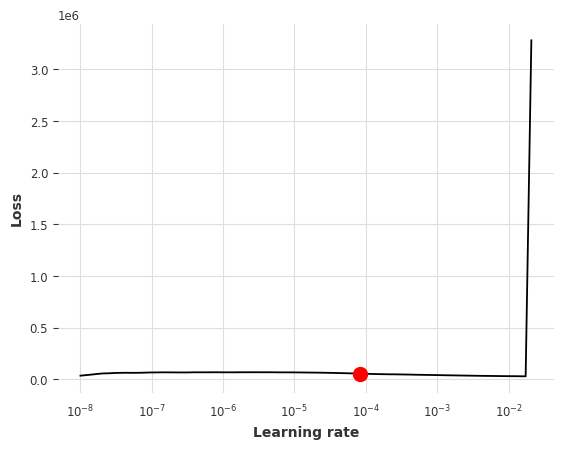

In [7]:
lr_finder.plot(suggest=True, show=True)
plt.close()

In [10]:
model.predict(10, series=train)

ValueError: The model must be fit before calling predict(). For global models, if predict() is called without specifying a series, the model must have been fit on a single training series.


ValueError: The model must be fit before calling predict(). For global models, if predict() is called without specifying a series, the model must have been fit on a single training series.

In [ ]:
lr_finder.suggestion()

In [ ]:
model = NBEATSModel(
    input_chunk_length=7,
    output_chunk_length=1,
    random_state=42,
    optimizer_cls=Adam,
    optimizer_kwargs={"lr": lr_finder.suggestion()},
)

In [ ]:
model.fit(train, val_series=val, verbose=True)